# Are CO₂ Emissions a Health Hazard or Just a Side Effect of Progress?


With the data prepared, we now present three visualizations supporting each perspective. Each visualization is accompanied by a brief insight and an explanation linking it to the respective argument.














# Perspective 2: Are Other Factors More Important than Emissions for Life Expectancy?

Perspective 2 suggests that development and public health infrastructure drive healthy lifespan, not emissions per se. If this is true, we expect to see that as countries get wealthier (often accompanied by more emissions), their healthy life expectancy increases – indicating a positive or neutral relationship between emissions and health when development is accounted for. We also expect that countries with the longest healthy lifespans are those with strong healthcare and high living standards, rather than the lowest emitters. The following visuals explore these patterns.
# Visualization 4. Historical CO₂ Emissions vs Healthy Life Expectancy
 – Do countries that industrialized (high historic emissions) have longer healthy lives?

**Caption:** Each point is a country (2019), plotting total historical CO₂ emitted (on a log scale) against healthy life expectancy. A clear upward trend emerges: countries with a larger cumulative CO₂ footprint (toward the right) tend to have higher healthy life expectancy.
**Insight:** This chart reveals a strong positive association: nations that have emitted the most CO₂ over history, typically more developed economies, almost all enjoy high healthy life expectancies (70+ years). For instance, countries like Japan, Germany, the UK, or the U.S. (far right) have among the longest healthy lifespans. Conversely, countries with negligible historical emissions (far left) are generally those with shorter healthy lives (often under 60 years). This does not mean emitting CO₂ causes people to live longer; rather, it indicates that industrialization and development, which inevitably came with CO₂ emissions, enabled better health outcomes. In other words, wealth and infrastructure correlate with both high emissions and high life expectancy. This aligns with Perspective 2: healthy longevity is achieved through improved hospitals, nutrition, education, and living conditions which have historically been financed by the economic growth that also drove up emissions. The implication is that life expectancy can rise alongside emissions if development is occurring, and that cutting emissions need not reduce life expectancy as long as development and healthcare are maintained.

# Visualization 5. Emissions vs Healthy Life Expectancy Over Time (Interactive) 
– How have emissions and health evolved together from 2000 to 2021?

**Caption:** This interactive bubble chart (select the play button) shows countries moving from 2000 to 2021. Bubbles typically drift upwards and to the right over time, meaning both CO₂ emissions per capita and healthy life expectancy have increased in tandem for many countries.
**Insight:** The animation reinforces that in the last two decades, life expectancy improvements often coincided with rising emissions. Developing countries (with lower starting health and emissions) move markedly up-right: for example, India and Bangladesh start near the bottom-left in 2000 (low emissions, ~50s HALE) and progress upward by 2019 (somewhat higher emissions, HALE in 60s). China’s bubble shoots to the right (big emission surge) and also climbs upward (HALE from low 60s to high 60s). Most high-income countries were already in the upper-right and tend to inch further up (health gains) even as their emissions per capita plateau or decline slightly. Notably, European countries have modest or falling CO₂ per capita but still improve health to around 70+ healthy years, showing that it’s possible to gain in health while curbing emissions. The overall picture supports Perspective 2: there is no general trade-off where increasing emissions universally lowers life expectancy if anything, countries have managed to raise healthy life expectancy substantially despite higher emissions. This suggests that improving medical care, sanitation, education, and incomes (which often come with industrial growth) has a more immediate and powerful effect on health than the hypothesized negative effects of CO₂. Of course, this does not mean CO₂-driven climate change has no future health impact; rather, up to 2021, socioeconomic progress appears to outweigh any direct life expectancy harms from emissions.
# Visualization 6. Global Overview: Emissions and Health by Country (2019)
 – Who has high emissions, and who lives long and healthy?

**Caption:** In this world map, bubble size represents CO₂ emissions per capita and color represents healthy life expectancy (yellow-green = shorter healthy lives, blue-purple = longer healthy lives). We see large bubbles concentrated in North America, the Middle East, and parts of Asia/Oceania (indicating high per-person emissions), whereas small bubbles cover most of Africa and South Asia (minimal emissions). Crucially, many large bubbles are colored blue/purple – for example, the US, Canada, Australia, and Gulf states have high HALE (~65–75 years) despite high emissions. In contrast, the smallest bubbles (low emitters) in sub-Saharan Africa are often yellowish, showing low healthy life expectancy (50s).
**Insight**: This global view underscores that long healthy lives are achieved across a range of emission levels, and the worst health outcomes are mostly in low-emission, low-income countries. High emissions per capita are primarily a feature of wealthy nations and oil producers. These countries generally have the infrastructure for high life expectancy (though not always the very highest: e.g., the USA’s HALE is lower than some lower-emission European countries). Meanwhile, countries with the shortest healthy lifespans are poor and emit very little CO₂. This pattern supports the idea that economic and health system development are the dominant factors for healthy life expectancy, not CO₂ levels. If anything, the map suggests an injustice: those who have contributed least to emissions (and climate change) often have the lowest life expectancies. It also implies that reducing emissions in high-HALE countries (for sustainability) should be feasible without sacrificing their hard-won health outcomes, given their strong health systems. In summary, Perspective 2 finds that life expectancy is more strongly tied to wealth and public health investments than to carbon emissions. Policies focusing on improving healthcare, nutrition, and the environment together could continue to raise healthy life expectancy while also cutting unnecessary CO₂ emissions.


# References:



# External Links:
https://github.com/Haldor77/informationvisualisation

# Perspective 1:
 Do Higher CO₂ Emissions Shorten Healthy Lifespans?
This perspective expects to see negative correlations or warning signs that pollution from CO₂ emissions adversely affects health. We look for evidence that countries with higher emissions have lower healthy life expectancy, or that rapid emission growth is associated with stagnating health outcomes.


 # Visualization 1. 
CO₂ per Capita vs Healthy Life Expectancy (2019) – Is higher carbon output linked to lower healthy life expectancy?

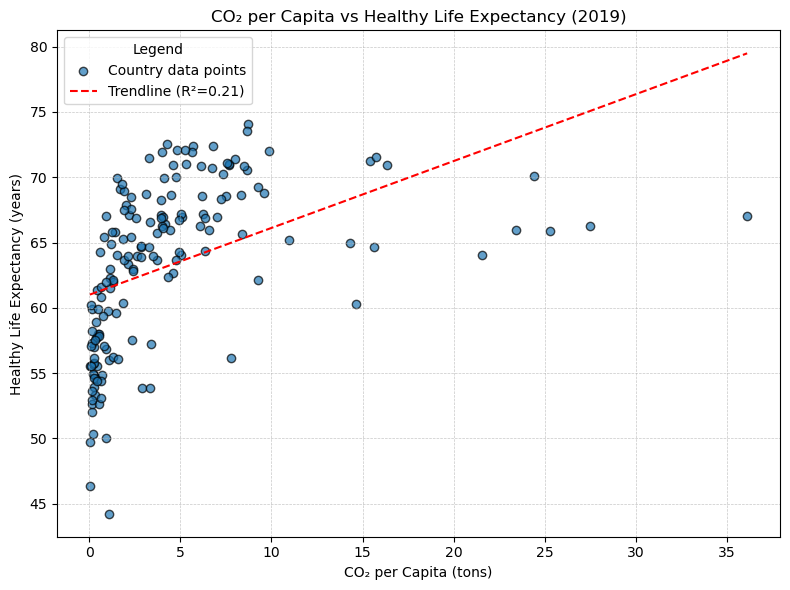

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 1) Data inladen (zelfde folder)
co2 = pd.read_csv('owid-co2-data.csv', usecols=['country','year','co2_per_capita'])
hale = pd.read_csv('C64284D_ALL_LATEST.csv')

# 2) Healthy life expectancy filter en renaming
hale = hale.loc[
    (hale['IND_NAME']=='Healthy life expectancy (at birth)') &
    (hale['DIM_SEX']=='TOTAL'),
    ['GEO_NAME_SHORT','DIM_TIME','AMOUNT_N']
].rename(columns={
    'GEO_NAME_SHORT':'country',
    'DIM_TIME':'year',
    'AMOUNT_N':'healthy_life_expectancy'
})

# 3) Merge en filter voor 2019
co2['year'] = co2['year'].astype(int)
hale['year'] = hale['year'].astype(int)
merged = pd.merge(co2, hale, on=['country','year'], how='inner')
df2019 = merged.query("year == 2019")

# 4) Data voor plot
x = df2019['co2_per_capita']
y = df2019['healthy_life_expectancy']

# 5) Bereken OLS-trendline
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line_x = np.linspace(x.min(), x.max(), 100)
line_y = slope * line_x + intercept

# 6) Plotten met legenda voor punten én trendline
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.7, edgecolor='k', label='Country data points')
plt.plot(line_x, line_y, color='red', linestyle='--',
         label=f'Trendline (R²={r_value**2:.2f})')

plt.xlabel('CO₂ per Capita (tons)')
plt.ylabel('Healthy Life Expectancy (years)')
plt.title('CO₂ per Capita vs Healthy Life Expectancy (2019)')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title='Legend')
plt.tight_layout()
plt.show()



**Caption:** Each point is a country in 2019. We might expect a downward trend if emissions were broadly harming health, but the pattern is not clear-cut. Many high-emission countries (far right) actually enjoy high healthy life expectancy, while low-emission countries (far left) often have low healthy life expectancy. The fitted trendline (from an OLS regression) is nearly flat, indicating no strong linear relationship globally.

**Insight**: At a global level, there is no obvious negative correlation between CO₂ emissions per person and healthy life expectancy. For example, the United States and Gulf countries have some of the highest per-capita CO₂ emissions yet still report healthy life expectancies around 65–70+ years. In contrast, countries with minimal emissions (mostly low-income nations) cluster in the lower-left, with healthy life expectancy often below 60 years. This suggests that factors other than emissions (like economic development) are dominating the health outcomes. However, supporters of Perspective 1 point out that this global view could mask specific health costs of emissions for instance, chronic air pollution in rapidly industrializing countries might be limiting further health gains. The lack of a clear inverse trend here hints that CO₂’s impact on health is indirect and tangled with development rather than a simple one-to-one effect.


# Visualization 2. Emissions and Health in Selected Countries (2019)
 – Case comparison of a high emitter vs. a low emitter vs. a moderate emitter.


In [28]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# 1) Data inladen en voorbereiden
co2 = pd.read_csv('owid-co2-data.csv', usecols=['country','year','co2_per_capita'])
hale = pd.read_csv('C64284D_ALL_LATEST.csv')

# Harmoniseren landnaam
co2['country'] = co2['country'].replace({'United States':'United States of America'})

# Filter Healthy life expectancy
hale = (
    hale.loc[
        (hale['IND_NAME']=='Healthy life expectancy (at birth)') &
        (hale['DIM_SEX']=='TOTAL'),
        ['GEO_NAME_SHORT','DIM_TIME','AMOUNT_N']
    ]
    .rename(columns={
        'GEO_NAME_SHORT':'country',
        'DIM_TIME':'year',
        'AMOUNT_N':'healthy_life_expectancy'
    })
)

# Jaar als int, merge en filter voor 2019 + geselecteerde landen
co2['year'] = co2['year'].astype(int)
hale['year'] = hale['year'].astype(int)
merged = pd.merge(co2, hale, on=['country','year'], how='inner')

countries = [
    'United States of America',
    'France',
    'India'
]

df2019 = (
    merged
    .query("year == 2019 and country in @countries")
    .set_index('country')
    .loc[countries]
    .reset_index()
)

# 2) X-waarden en barbreedte
x = np.arange(len(countries))
width = 0.4

# 3) Bouw de interactieve figuur
fig = go.Figure()

# CO₂ per Capita (linker y-as)
fig.add_trace(go.Bar(
    x=x - width/2,
    y=df2019['co2_per_capita'],
    name='CO₂ per Capita (tons)',
    marker_color='orange',
    yaxis='y1',
    hovertemplate='CO₂: %{y} ton<extra></extra>'
))

# Healthy Life Expectancy (rechter y-as)
fig.add_trace(go.Bar(
    x=x + width/2,
    y=df2019['healthy_life_expectancy'],
    name='Healthy Life Expectancy (years)',
    marker_color='blue',
    yaxis='y2',
    hovertemplate='Gezonde levensverwachting: %{y} jaar<extra></extra>'
))

# 4) Layout met dubbele y-as en styling gelijk aan matplotlib
fig.update_layout(
    title="Emissions vs Healthy Life Expectancy: U.S. vs France vs India (2019)",
    xaxis=dict(
        tickmode='array',
        tickvals=x,
        ticktext=countries,
        tickangle=15,
        title='Country'
    ),
    yaxis=dict(
        title='CO₂ per Capita (tons)',
        titlefont=dict(color='orange'),
        tickfont=dict(color='orange')
    ),
    yaxis2=dict(
        title='Healthy Life Expectancy (years)',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue'),
        overlaying='y',
        side='right'
    ),
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        x=0.5,
        xanchor='center'
    ),
    bargap=0.2,
    margin=dict(t=80, b=50, l=60, r=60)
)

# 5) Toon interactieve grafiek
fig.show()

# Optioneel: exporteer naar standalone HTML
# fig.write_html("emissions_health_2019.html", include_plotlyjs='cdn')



**Caption:** This bar chart contrasts CO₂ emissions per capita (left axis, orange bars) with healthy life expectancy (right axis, blue bars) for three example countries in 2019. The United States emits far more CO₂ per person (≈15 tons) than France (≈5 tons) or India (<2 tons). Yet, Americans have a shorter healthy life expectancy (~66 years) than the French (~72 years). Indians have a much lower healthy lifespan (~60 years) alongside very low emissions.

**Insight:** The comparison highlights that more emissions do not guarantee better health. The U.S. vs France gap is telling: Americans emit about 3× more CO₂ per capita, but enjoy roughly 6 fewer healthy years on average than the French. This could be due to 
pollution or other lifestyle and healthcare differences, perspective 1 would note that high emissions (often accompanied by pollution and greenhouse effects) might be undermining health in the U.S., which struggles with issues like air quality and chronic disease. Meanwhile, India shows the opposite extreme: very low emissions come with low healthy life expectancy, primarily due to poverty and limited healthcare. While India’s low emissions are not causing poor health (rather, they reflect less industrial development), perspective 1 advocates worry that as India’s emissions rise, environmental health burdens (e.g. smog in cities) could further challenge its progress. This case study suggests that beyond a certain point, increasing emissions is associated with diminishing health returns, France achieves higher health with lower emissions than the U.S.,aligning with the idea that cleaner development paths might support longer healthy lives.

# Visualization 3. Air Quality and Health Trend – China as a Case (2000–2021)
 – Does rapid emission growth slow health progress?

In [31]:
# ── Complete Cel: Plotly-plot met notebook_connected renderer ──

import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

# Zet renderer op notebook_connected voor inline weergave
pio.renderers.default = "notebook_connected"

# Data inladen & filteren
co2 = pd.read_csv('owid-co2-data.csv', usecols=['country','year','co2_per_capita'])
hale = pd.read_csv('C64284D_ALL_LATEST.csv')

# Harmoniseer & converteer jaartal
co2['year'] = co2['year'].astype(int)
hale = (
    hale.loc[
        (hale['IND_NAME']=='Healthy life expectancy (at birth)') &
        (hale['DIM_SEX']=='TOTAL'),
        ['GEO_NAME_SHORT','DIM_TIME','AMOUNT_N']
    ]
    .rename(columns={
        'GEO_NAME_SHORT':'country',
        'DIM_TIME':'year',
        'AMOUNT_N':'healthy_life_expectancy'
    })
)
hale['year'] = hale['year'].astype(int)

# Filter op China 2000–2021 en merge
co2_china  = co2.query("country=='China' and 2000 <= year <= 2021")
hale_china = hale.query("country=='China' and 2000 <= year <= 2021")
china = pd.merge(co2_china, hale_china, on=['country','year']).sort_values('year')

# Bouw figuur
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=china['year'], y=china['co2_per_capita'],
    name='CO₂ per Capita (tons)', mode='lines+markers',
    marker=dict(color='orange'), line=dict(color='orange'),
    yaxis='y1', hovertemplate='CO₂: %{y:.2f} ton<extra></extra>'
))
fig.add_trace(go.Scatter(
    x=china['year'], y=china['healthy_life_expectancy'],
    name='Healthy Life Expectancy (years)', mode='lines+markers',
    marker=dict(color='blue'), line=dict(color='blue'),
    yaxis='y2', hovertemplate='Gezonde levensverwachting: %{y:.1f} jaar<extra></extra>'
))
fig.update_layout(
    title='China: Trend of CO₂ per Capita and Healthy Life Expectancy (2000–2021)',
    xaxis=dict(title='Year'),
    yaxis=dict(
        title='CO₂ per Capita (tons)',
        titlefont=dict(color='orange'),
        tickfont=dict(color='orange')
    ),
    yaxis2=dict(
        title='Healthy Life Expectancy (years)',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue'),
        overlaying='y', side='right'
    ),
    legend=dict(orientation='h', yanchor='bottom', y=1.02, x=0.5, xanchor='center'),
    margin=dict(t=80, b=50, l=60, r=60)
)

# Toon grafiek inline
fig.show()


**Caption:** This line chart shows China’s CO₂ emissions per capita (orange line, in tons) and healthy life expectancy at birth (blue line, in years) from 2000 to 2021. China’s CO₂ per person surged dramatically (more than tripling over two decades), while healthy life expectancy also rose steadily (from about 62 up to ~68 years).

**Insight:** China illustrates a nuanced story. Despite severe pollution challenges during its rapid industrialization, healthy life expectancy still improved significantly as the country became wealthier. There isn’t an obvious dip or slowdown in the upward health trend corresponding to rising emissions in fact, both lines climb upward. Advocates of perspective 1, however, argue that China’s health gains could have been even greater without the heavy air pollution that accompanied its coal-driven economic boom. In the 2010s, recognizing these issues, China enacted aggressive clean air policies. Noticeably, the curve of CO₂ per capita leveled off slightly toward 2019, and pollution levels in cities started dropping, which may help future health outcomes. This example underscores that while high emissions haven’t stopped health improvements outright, they likely impose hidden costs: respiratory illnesses, environmental stress, and fewer healthy years than might be possible in a cleaner environment. The full negative impact of emissions might be long-term through climate change and not fully captured in this 20-year window. Overall, the data for perspective 1 shows some hints (like the U.S. vs France comparison) that excessive emissions and pollution correlate with health drawbacks, but the relationship is complex and often outweighed by socioeconomic factors.